In [66]:
#importing necessary libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# #imporot the patch for the google colab
from google.colab.patches import cv2_imshow

In [67]:
#specifying the folder in the google drive
folder_name = '/content/drive/MyDrive/CO543-Image Processing/Lab5/'

In [68]:
#load the image
img = cv2.imread(folder_name+'car-2.jpg',0)
img

array([[  0, 196,   0, ...,   3, 197, 102],
       [210,   0, 148, ..., 255,   2,  98],
       [  0, 184,   0, ...,  14, 123, 101],
       ...,
       [201,  12, 204, ..., 255, 117, 199],
       [  2, 254,  32, ...,   8, 255, 165],
       [210,  24, 175, ..., 241, 117, 219]], dtype=uint8)

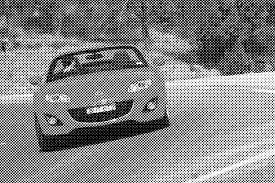

In [69]:
#display the image
cv2_imshow(img)

In [70]:
#function definition for comparing two images
def compare_2_imgs(img1,img2):
  #set the figure size
  plt.figure(figsize=(10,7))

  #make subplots for two plots
  plt.subplot(1,2,1)

  #draw the image on the first plot
  plt.imshow(img1, cmap='gray', vmin = 0, vmax = 255,interpolation='none')

  #set the title of the original image
  plt.title('Original Image')

  #turn off the axis
  plt.axis('off')

  #make the second plot
  plt.subplot(1,2,2)

  #draw the second plot
  plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255,interpolation='none')

  #set the title of the filtered image
  plt.title('Filtered Image')

  #turn off the axis
  plt.axis('off')

  #make the tight layout
  plt.tight_layout()


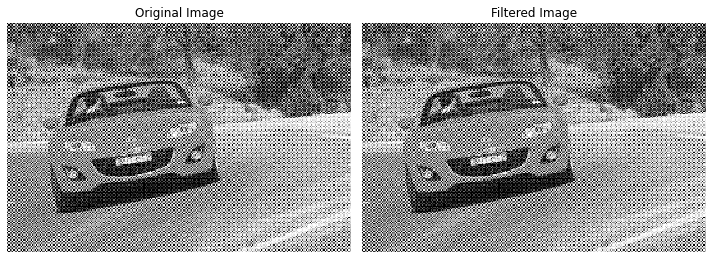

In [71]:
#testing the function with the imported image
compare_2_imgs(img,img)

##Task 01 

Apply high pass laplacian filter on Car.jpg image.

In [72]:
#apply the laplaian filter using the in-built function in the cv2
def laplace_img(img,kernal_size):
  laplace_filtered_img = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=3)
  return laplace_filtered_img

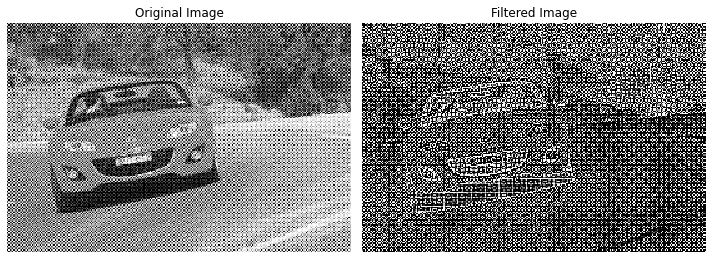

In [73]:
#display the results
laplace = laplace_img(img,3)
compare_2_imgs(img,laplace)

##Task 02

Apply ideal high-pass filter on Car.jpg image for D0=100

In [74]:
#function defintion for high pass filter
def high_pass_filter(img,size):

  #getting the height and the width
  height , width = img.shape[0:2]

  #getting the mid of the image
  mid_height = int(height/2)
  mid_width = int(width/2)
  
  #setting the corresponding section to 0
  img[mid_height-int(size/2):mid_height+int(size/2), mid_width-int(size/2):mid_width+int(size/2)] = 0
  
  return img


In [75]:
def display_pass_filtered(img,option=0):
  #apply fourier transform
  ft_img = np.fft.fft2(img)

  #move the frequency domain
  shifted_img = np.fft.fftshift(ft_img)

  if option == 1:
    #apply high pass filter
    shifted_img=high_pass_filter(shifted_img,100)
  elif option == 2:
    shifted_img=low_pass_filter(shifted_img,100)

  resulted_img = np.log(np.abs(shifted_img))

  #apply inverse fourier transform
  inv_tr = np.fft.ifftshift(shifted_img)

  #geeting the image
  ifimg = np.fft.ifft2(inv_tr)

  ifimg = np.abs(ifimg)

  #compare results
  compare_2_imgs(img,ifimg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


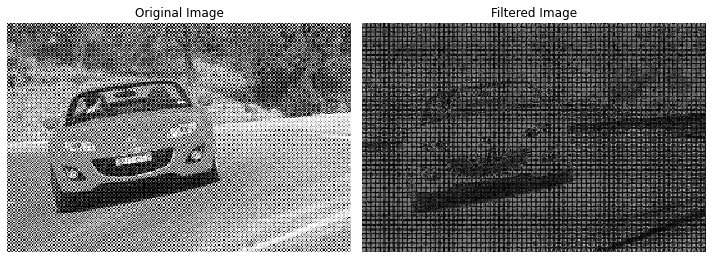

In [76]:
#show high pass filter
display_pass_filtered(img,1)

## Task 03

Apply ideal low-pass filter on Car.jpg image for D0=100


In [77]:
#function definition for low pass filter
def low_pass_filter(img,D):

  #getting the height and the width
  height , width = img.shape[0:2]

  #getting the mid of the image
  mid_height = int(height/2)
  mid_width = int(width/2)

  #defnine a black image similar to the given image
  img_zeros = np.zeros((height, width), np.uint8)

  #set the corresponding section to 1
  img_zeros[mid_height-int(D/2):mid_height+int(D/2), mid_width-int(D/2):mid_width+int(D/2)] = 1

  #return the low pass filter
  return img_zeros*img


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


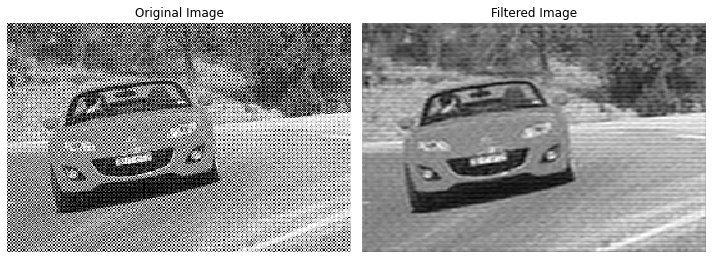

In [78]:
#show high pass filter
display_pass_filtered(img,2)

##Task 04

Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.

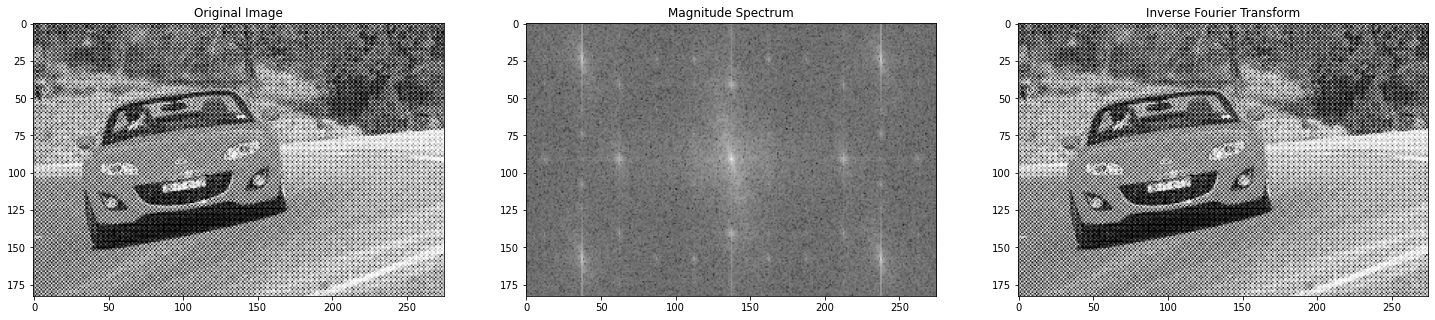

In [79]:
#transforming the image
transformed_img = np.fft.fft2(img)

#shifting the image
shifted_img = np.fft.fftshift(transformed_img)

#getting the magnitude specturnm of the image
magnitude_spectrum = np.abs(shifted_img)

#inverse
inv_img = np.fft.ifft2(shifted_img)

#plotting three images
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(25, 15))
axis1.set_title('Original Image')
axis1.imshow(img, cmap='gray')
axis2.set_title('Magnitude Spectrum')
axis2.imshow(20 * np.log(magnitude_spectrum), cmap='gray')
axis3.set_title('Inverse Fourier Transform')
axis3.imshow(np.abs(inv_img), cmap='gray')

In [80]:
#function definition for the gaussian kernal
#this is a supporting function for the gaussian filter
def gaussian_kernel(img, sigma_value):
  return np.exp(-(img ** 2) / (2 * sigma_value ** 2)) / (2 * np.pi * sigma_value ** 2)


In [81]:
#function definition for the guasiisan filter
def gaussian_lowpass(img, mask_size, sigma_value):

  #get the kernal as a set of zeros
  kernel = np.zeros(mask_size, dtype=np.float32)

  #get the radius
  radius = mask_size[0]

  #get the low pass gaussian
  for i in range(mask_size[0]):
    for j in range(mask_size[1]):
      kernel[i, j] = gaussian_kernel((i - radius) ** 2 + (j - radius) **2,sigma_value)
  
  #get the kernal
  kernel /= np.sum(kernel)

  #return the low pass gaussian filter
  return cv2.filter2D(img, -1, kernel)

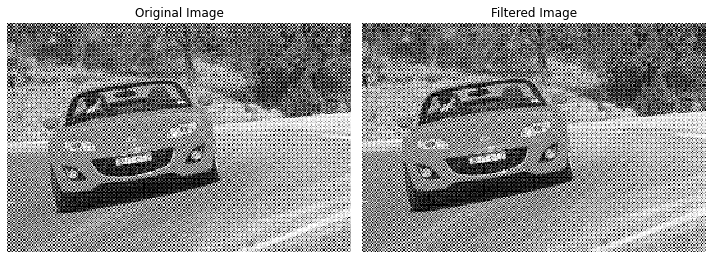

In [82]:
#apply low pass gaussian filter and display
gaussian_lowpass_img = gaussian_lowpass(img,(3,3),1)
compare_2_imgs(img, gaussian_lowpass_img)

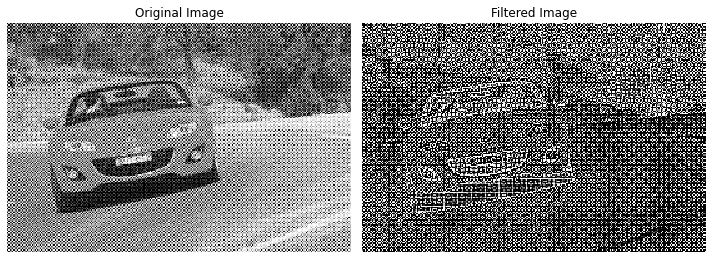

In [83]:
#apply high pass laplacian filter and display
laplace = laplace_img(img,3)
compare_2_imgs(img,laplace)

##Task 05

Apply the necessary filter and correct the noise in the image. Image file is uploaded.


In [86]:
#apply the fourier transform
transformed_img = np.fft.fft2(img)  
fftshift_img = np.fft.fftshift(transformed_img)

#get the height and width
height,width = img.shape

#apply gaussian filter
sigma_value = 25
gaussian_filter_1 = [1/(np.sqrt(2*np.pi)*sigma_value)*np.exp(-x**2/(2*sigma_value**2)) for x in range(-height//2,height//2)]
gaussian_filter_2 = [1/(np.sqrt(2*np.pi)*sigma_value)*np.exp(-x**2/(2*sigma_value**2)) for x in range(-width//2,width//2)]
gausian_filter = np.outer(gaussian_filter_1, gaussian_filter_2)

#get absolute value
filtered_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fftshift_img * gausian_filter)))

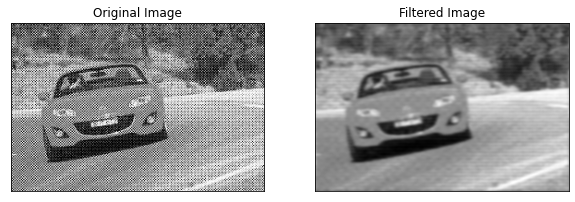

In [88]:
#plotting the results

#set the fitler size
plt.figure(figsize=(10,7))

#plot the resutls in subplot
plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(filtered_img, cmap = 'gray'),plt.title('Filtered Image'), plt.xticks([]), plt.yticks([]) 
plt.show()

##Task 06

Apply the sobel operator (filter) on Car.jpg in the Fourier domain to detect edges

In [93]:
def sobel_filter(img):

  # array for the Sx
  x_ = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])

  # array for the Sy
  y_ = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

  #defining the padding values
  padding_x = (img.shape[0] - x_.shape[0], img.shape[1] - x_.shape[1])
  padding_y = (img.shape[0] - y_.shape[0], img.shape[1] - y_.shape[1])
  
  #getting the Sx and Sy which are incoporated with the padding
  Sx = np.pad(x_, (((padding_x[0] + 1) // 2, padding_x[0]//2),((padding_x[1] + 1) // 2, padding_x[1] // 2)), 'constant')
  Sy = np.pad(y_, (((padding_y[0] + 1) // 2, padding_y[0] //2),((padding_y[1] + 1) // 2, padding_y[1] // 2)), 'constant')

  #shift Sx and Sy
  Sx_shifted = np.fft.ifftshift(Sx)
  Sy_shifted = np.fft.ifftshift(Sy)

  #return the filtered image
  return np.abs(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(Sx_shifted)) + np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(Sy_shifted)))


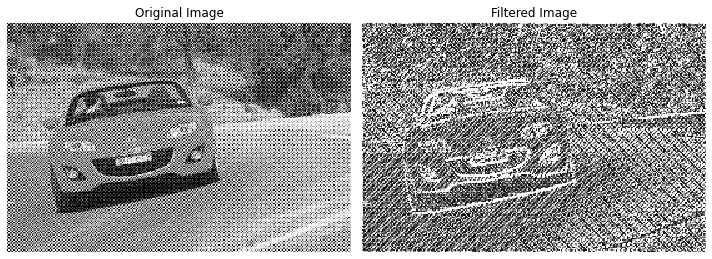

In [94]:
sobel_img = sobel_filter(img)
compare_2_imgs(img, filtered_img)

## Task 07

Discuss applying Butterworth and Chebyshev filters and compare the output image with the
Gaussian Filter image (You may use a preferred image to discuss the characteristics of the
output images in Q7.)


In [100]:
def butterworth(img, n, d0):

  #define the kernal
  kernel = np.array([[1 / (1 + ((x ** 2 + y ** 2) / (d0 ** 2)) ** n)

  #getting the x and y
  for x in range(-img.shape[1] // 2, img.shape[1] // 2)] 
  for y in range(-img.shape[0] //2, img.shape[0] // 2)], dtype=np.float32)

  #fft shifting the image
  fftshift_img = np.fft.fftshift(np.fft.fft2(img))

  #filtering the image
  filtered = np.fft.ifftshift(fftshift_img * kernel)

  #returning the filtered image
  return np.abs(np.fft.ifft2(filtered))

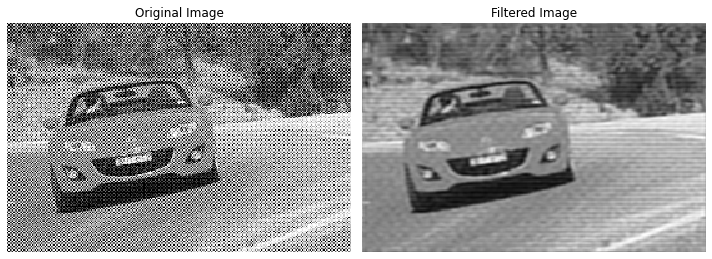

In [101]:
#displaying the results
butterworth_img = butterworth(img, 5, 50)
compare_2_imgs(img,butterworth_img)

In [103]:
#function definition for the lowpass filter
def chebyshev_lowpass(img, n, rs, Wn):
  #importing the library
  from scipy.signal import cheby2, filtfilt

  #retuning the filtered image
  b_val, a_val = cheby2(n, rs, Wn)
  return filtfilt(b_val, a_val, img)

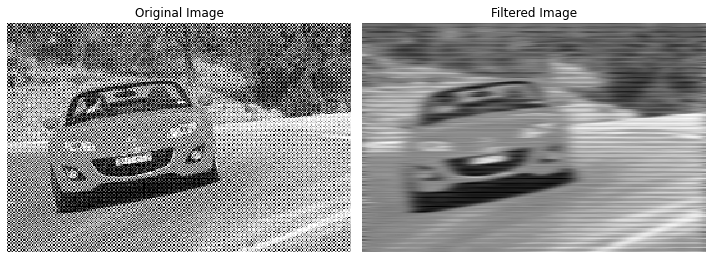

In [104]:
#getting the output image
chebyshev_img = chebyshev_lowpass(img, 2, 30, 0.3)

#printing the image
compare_2_imgs(img,chebyshev_img)

(-0.5, 274.5, 182.5, -0.5)

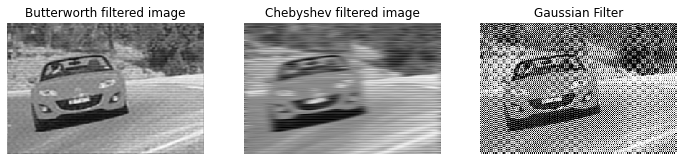

In [107]:
#plots all three images for comparison

#setting the figure size
plt.figure(figsize=(12,10))

#in the first sub plot, draw the buttorworth fitler
plt.subplot(1,3,1)
plt.imshow(butterworth_img, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.title('Butterworth filtered image')
plt.axis('off')

#in the second sub plot, draw the chebyshev filter
plt.subplot(1,3,2)
plt.imshow(chebyshev_img, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.title('Chebyshev filtered image')
plt.axis('off')

#in the thrid sub plot, draw the low pass filter
plt.subplot(1,3,3)
plt.imshow(gaussian_lowpass_img, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.title('Gaussian Filter')
plt.axis('off')


It can be seen that the chebyshev's filter output is more fuzzy than the butterworth lowpass filter output. The noise is removed using a Gaussian filter. The uncertainty relation is optimized using the Gaussian filter. Without ringing, it gives the sharpest cutoff imaginable. However, the noise may still be observed in the output of the gaussian filter. To reduce this type of noise, the Butterworth filter is more effective.